In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
df = pd.read_csv('data/data_sinta_raw_s4_full.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,jid,eissn,desc,title,date
0,10000,25803786,Teknologi reproduksi aseksual anemon merupakan...,alih teknologi produksi benih anemon laut sec...,2017-04-28
1,10000,25803786,Kegiatan ini bertujuan untuk meningkatkan kual...,peningkatan kualitas produk olahan sambusaq tu...,2017-04-28
2,10000,25803786,Kegiatan Pengabdian kepada Masyarakat ini dila...,model pemanfaatan urine sapi sebagai pupuk org...,2017-04-28
3,10000,25803786,Sulawesi Selatan khususnya Kabupaten Enrekang ...,penerapan teknologi tepat guna pada pengolahan...,2017-04-28
4,10000,25803786,Kabupaten Sidrap menembus angka 94 kasus HIV-A...,penyuluhan pencegahan dan penularan hiv-aids p...,2017-04-28
...,...,...,...,...,...
348026,9996,26152835,Feline panleukopenia is an infectious disease ...,feline panleucopenia in bengal cats at hasanud...,2023-11-08
348027,9996,26152835,Turtles are reptiles that are very easy to rec...,a case handling bladder stone on the turtle (c...,2024-03-10
348028,9996,26152835,The objective of this study was to see whether...,bentonite addition in quail diet (coturnix-cot...,2024-02-28
348029,9996,26152835,This study aims to determine the histological ...,comparative histology of the skin between sumb...,2024-04-29


In [4]:
# selected_eissn = df.eissn.sample().values[-1]
selected_eissn = '25988301' #Jurnal Darma Agung

selected_journal = df[df.eissn == selected_eissn]
selected_journal

,jid,eissn,desc,title,date
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25
...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03


In [5]:
selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
selected_journal['lang'] = selected_journal.data_cleaned.apply(lang_checker_langdetect)

selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\3472491142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\3472491142.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\3472491142.py:2: SettingWithCopyWarning: 
A value is trying to be set o

,jid,eissn,desc,title,date,data_cleaned,lang
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23,"pengaruh fee audit, audit tenure, komite audi...",id
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20,analisis ekonomi dan risiko usaha peternakan a...,en
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07,analisis kebutuhan pengembangan media pembelaj...,id
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16,analisis strategi pemasaran melalui pemasar...,en
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25,"pengaruh return on equity (roe), return on inv...",id
...,...,...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07,penerapan strategi komunikasi pemasaran pada p...,id
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30,"analisis literasi keuangan, sikap keuangan, da...",en
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03,strategi penyaluran kredit pertanian program b...,id
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03,pengaruh organizational culture terhadap innov...,id


<Axes: xlabel='lang'>

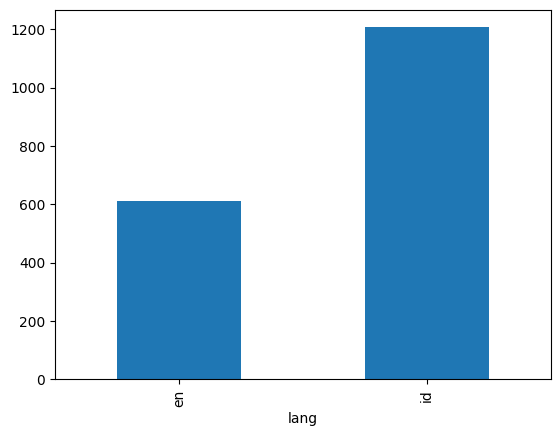

In [6]:
selected_journal.groupby('lang').count().eissn.plot(kind='bar')

In [7]:
tst = selected_journal.sample()[['title', 'desc', 'data_cleaned']]
tst.title.values[-1], tst.desc.values[-1], tst.data_cleaned.values[-1]

('model kinerja kewriausahaan di industri 4.0: kompetensi inti dan transformasi digital',
 'Abstrak\nIndustri 4.0 (I4.0) berkembang secara eksponensial sekaligus mendasari terjadinya Revolusi Industri keempat dan transformasi digital. Memadainya keterampilan baru, kompetensi inti, perilaku adaptif dan inovatif untuk menemukan dan mempraktikan model bisnis baru menjadi faktor penting yang mendukung keberlansungan bisnis dan kewirausahaan untuk bertahan dan berkembang di I4,0. Penelitian ini mendeskripsikan perkembangan I4.0 yang menuntut respon cepat, model dan proses bisnis terus terbarukan, kompetensi memadai dalam praktik transformasi digital yang terarah untuk menemukan model kinerja kewirausahaan yang unggul berkelanjutan. Pendekatan deskriptif kualitatif dipilih dengan library research dan content analysis beberapa literature relevan. Temuan menunjukkan bahwa keberhasilan model kinerja kewirausahaan di I4.0 difasilitasi oleh kompetensi inti dan praktik transformasi digital. Tahapa

In [8]:
le = LabelEncoder()

selected_journal['label'] = le.fit_transform(selected_journal.eissn)
selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\659796985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['label'] = le.fit_transform(selected_journal.eissn)


,jid,eissn,desc,title,date,data_cleaned,lang,label
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23,"pengaruh fee audit, audit tenure, komite audi...",id,0
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20,analisis ekonomi dan risiko usaha peternakan a...,en,0
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07,analisis kebutuhan pengembangan media pembelaj...,id,0
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16,analisis strategi pemasaran melalui pemasar...,en,0
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25,"pengaruh return on equity (roe), return on inv...",id,0
...,...,...,...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07,penerapan strategi komunikasi pemasaran pada p...,id,0
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30,"analisis literasi keuangan, sikap keuangan, da...",en,0
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03,strategi penyaluran kredit pertanian program b...,id,0
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03,pengaruh organizational culture terhadap innov...,id,0


In [9]:
selected_journal_en = selected_journal[selected_journal.lang == 'en']
selected_journal_id = selected_journal[selected_journal.lang == 'id']

selected_journal_id['data_cleaned'] = selected_journal_id.data_cleaned.apply(id_to_en)
selected_journal_id['lang'] = 'en'

translated_selected_journal = pd.concat([selected_journal_en, selected_journal_id])
translated_selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\225500321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['data_cleaned'] = selected_journal_id.data_cleaned.apply(id_to_en)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_10248\225500321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['lang'] = 'en'


,jid,eissn,desc,title,date,data_cleaned,lang,label
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20,analisis ekonomi dan risiko usaha peternakan a...,en,0
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16,analisis strategi pemasaran melalui pemasar...,en,0
75507,12955,25988301,This study's goal is to determine whether cert...,performance impact employee competence,2023-06-13,performance impact employee competence this st...,en,0
75509,12955,25988301,Abstrak \nTujuan dari penelitian ini adalah un...,produktivitas kerja pembuatan lipa’ le’leng ma...,2022-04-11,produktivitas kerja pembuatan lipa’ le’leng ma...,en,0
75510,12955,25988301,Abstract\nThis study aims to analyze the influ...,the effect of management and internal audit in...,2023-01-03,the effect of management and internal audit in...,en,0
...,...,...,...,...,...,...,...,...
77311,12955,25988301,Abstrak \nPenelitian ini menggunakan teknik an...,strategi komunikasi pemasaran brand kopi sabin...,2022-09-22,Sabin Banjarnegara coffee brand marketing comm...,en,0
77312,12955,25988301,Untuk menjalankan proses bisnis pada organisas...,perancangan enterprise architecture menggunaka...,2023-06-02,Enterprise architecture design using the togaf...,en,0
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07,implementation of marketing communication stra...,en,0
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03,agricultural credit distribution strategy for ...,en,0


In [13]:
translated_selected_journal.data_cleaned.sample().values[-1]

'faktor-faktor yang berpengaruh terhadap  audit judgment  pada inspektorat  daerah provinsi sulawesi selatan this writing aims to  provide empirical evidence about the influence of gender to audit judgment  provide empirical evidence about the influence of compliance pressure to audit judgment and  provide empirical evidence about the influence of task complexity to audit judgment this type of research is quantitative one the object of this study is the institution of inspectorate of south sulawesi province the sampling technique used purposive sampling method the data was collected through survey method by using questionnaires distributed directly to the staff of inspectorate of south sulawesi province the results of this study indicate that  gender affects positive and not significant to audit judgment  compliance pressure affects the negative and significant to audit judgment  the task complexity has negative and insignificant effect to audit judgment keywords gender compliance pres

In [24]:
model_checkpoint = 'bert-base-cased'
# model_checkpoint = 'bert-base-multilingual-cased'

# embedding_en = embed(selected_journal_en, model_checkpoint, device = device)
# embedding_id = embed(selected_journal_id, model_checkpoint2, device = device)

model_multibert = BertClassifierEmbed(12, model_checkpoint)
checkpoint_multibert = torch.load('model/bert_pipeline03_02.pt')
model_multibert.load_state_dict(checkpoint_multibert)

embeddings = embed(translated_selected_journal, model_checkpoint, model_multibert, device = device)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [25]:
embeddings.shape

(1818, 256, 768)

In [26]:
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

X.shape

(1818, 2)

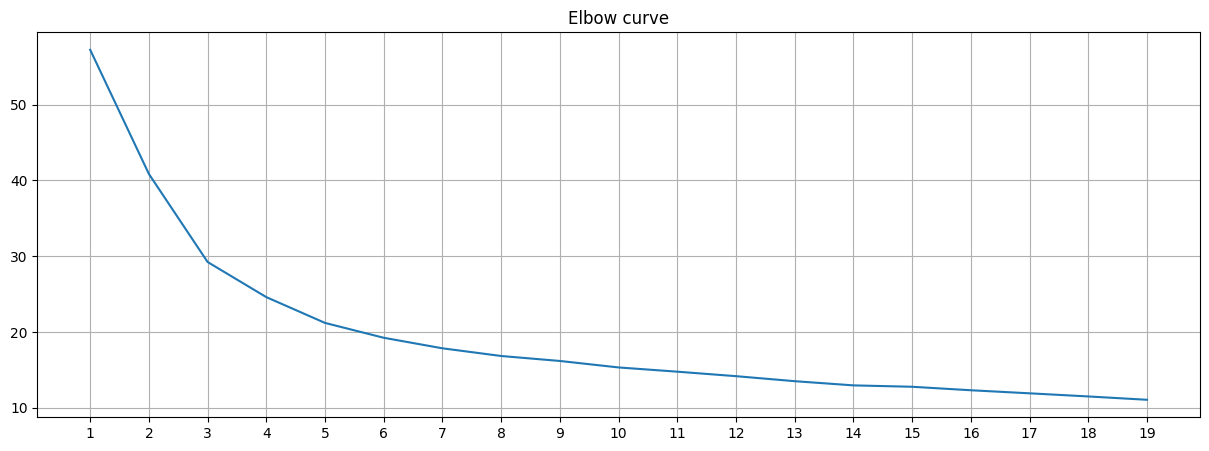

In [27]:
from scipy.spatial.distance import cdist

def elbow_method2(dataset):
    res = list()
    n_cluster = range(1,20)
    for n in n_cluster:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(dataset)
        res.append(np.average(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 20), res)
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.title('Elbow curve')

elbow_method2(X)

Best K: 3


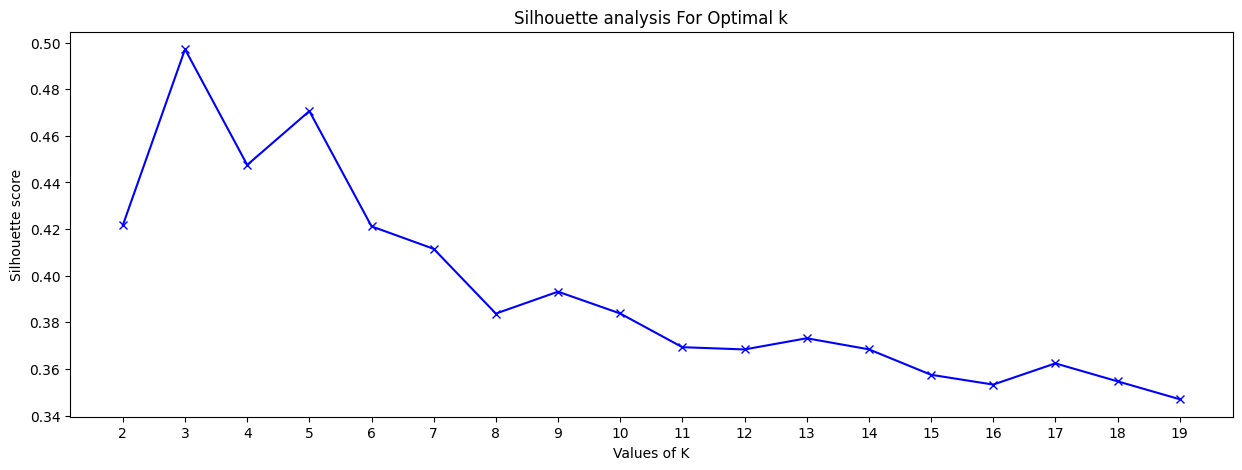

In [28]:
from sklearn.metrics import silhouette_score

def silhouette_method(dataset):
    silhouette_avg = []
    for num_clusters in list(range(2,20)):
        kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
        kmeans.fit_predict(dataset)
        score = silhouette_score(dataset, kmeans.labels_)
        silhouette_avg.append(score)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2,20),silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    _ = plt.xticks(np.arange(2,20))

    print (f"Best K: {np.argmax(silhouette_avg)+2}")

    return np.argmax(silhouette_avg)+2

best_n = silhouette_method(X)

In [29]:
lang = list(selected_journal_en.lang) + list(selected_journal_id.lang)

In [30]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= threshold]
outscoop_data = X[jarak_ke_centroid > threshold]

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1


d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


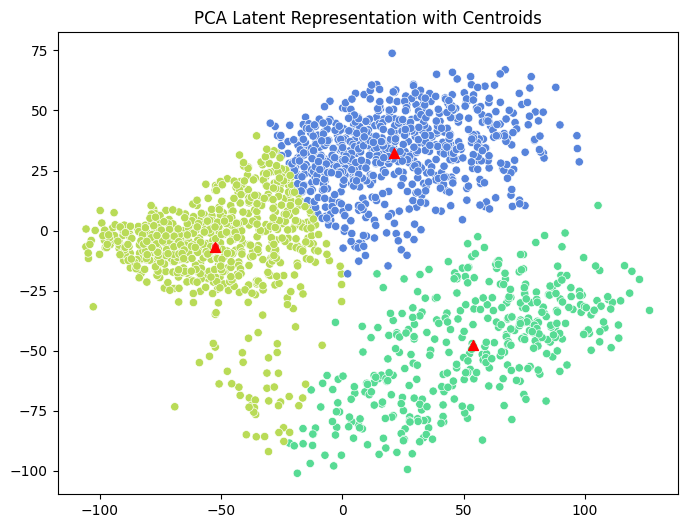

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


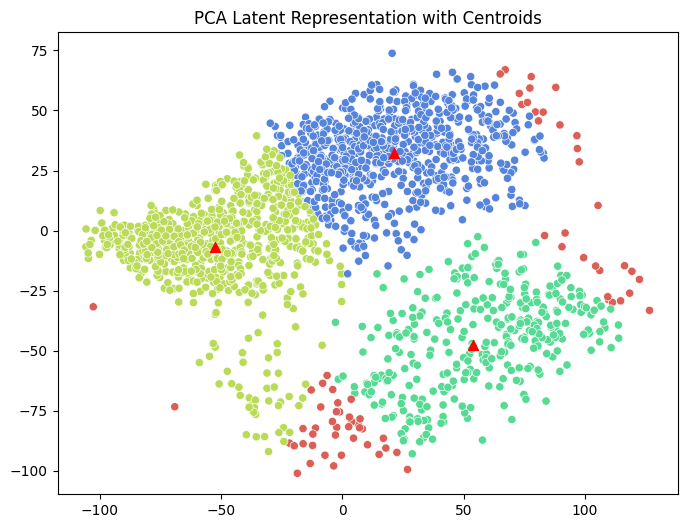

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


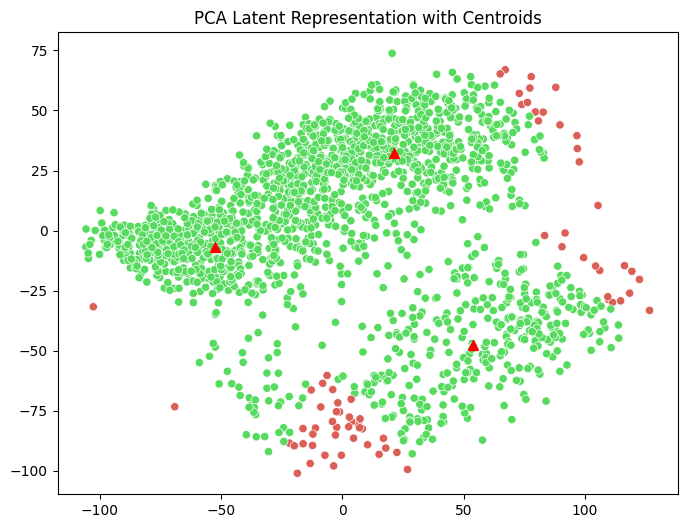

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


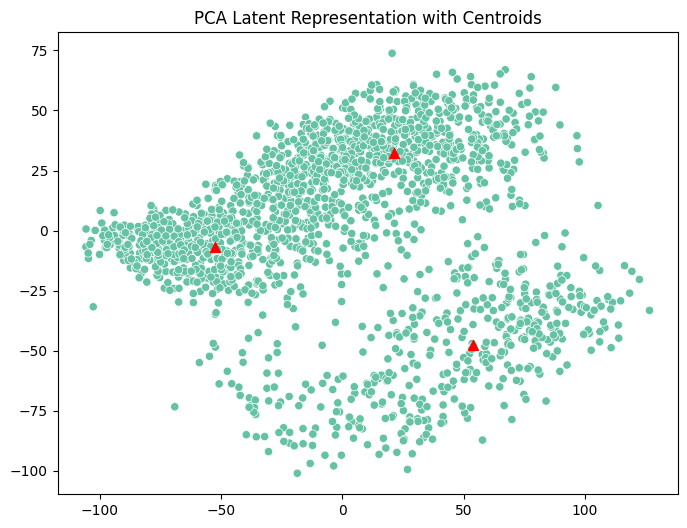

In [31]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=False)
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=True)
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus')
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='lang', lang=lang)

In [19]:
save_data(f'{selected_eissn}_1_3', 'pipeline_3', kmeans, threshold, X, embeddings, selected_journal.data_cleaned, scoop_labels)


Model Kmeans berhasil disimpan
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [21]:
jurnal_id = f'{selected_eissn}_1_3'
jurnal_type = 'pipeline_3'

kmeans, threshold, X, embeddings, df_res = load_data(jurnal_id, jurnal_type)
scoop_labels = df_res.Label

In [23]:
df_res[df_res.Label == -1].to_csv(f'outscoop_{selected_eissn}_1_3.csv', index=False)


d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


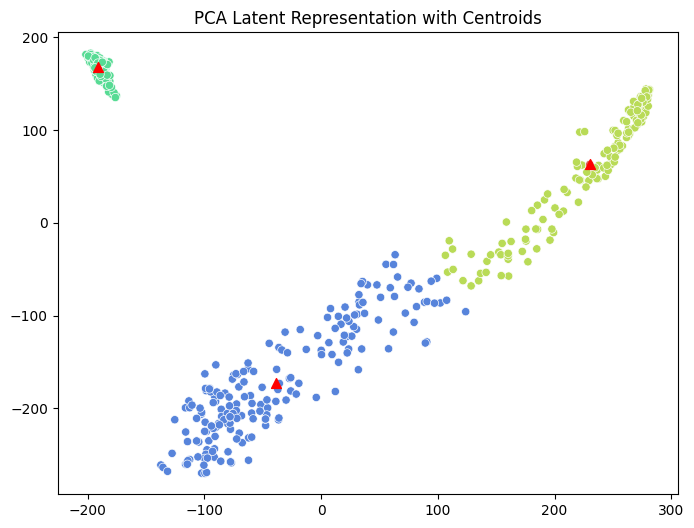

In [ ]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=False)

In [ ]:
selected_journal_id['scoop'] = list(scoop_labels[:len(selected_journal_id)])
selected_journal_en['scoop'] = list(scoop_labels[len(selected_journal_id):])

C:\Users\rarmn\AppData\Local\Temp\ipykernel_18176\573103879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['scoop'] = list(scoop_labels[:len(selected_journal_id)])
C:\Users\rarmn\AppData\Local\Temp\ipykernel_18176\573103879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_en['scoop'] = list(scoop_labels[len(selected_journal_id):])


In [ ]:
selected_journal_id

,jid,eissn,desc,title,date,data_cleaned,lang,label,scoop
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02,dinamika kepemimpinan transformasional dalam m...,id,0,1.0
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09,implementasi peraturan pemerintah nomor 27 tah...,id,0,1.0
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29,analisis efektivitas alat penukar kalor air pr...,id,0,1.0
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03,perancangan mesin pengayak pasir dengan kapasi...,id,0,1.0
210452,18473,26543915,Studi ini bertujuan untuk mengetahui perlindun...,analisis hukum terhadap sertifikat atas kesala...,2022-07-14,analisis hukum terhadap sertifikat atas kesala...,id,0,1.0
...,...,...,...,...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31,sistem informasi pemesanan perbaikan kendaraaa...,id,0,1.0
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21,kompilasi expresi dokumentasi persalinan pada...,id,0,1.0
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20,penyelesaian klaim asuransi jiwa pada pt. prud...,id,0,1.0
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26,komunikasi antarpribadi guru bimbingan konseli...,id,0,1.0


In [ ]:
print('scoop labels indonesia model : \n {} \n\nscoop labels english model : \n {}'.format(selected_journal_id.groupby('scoop').count().jid, selected_journal_en.groupby('scoop').count().jid))

scoop labels indonesia model : 
 scoop
-1.0     14
 1.0    329
Name: jid, dtype: int64 

scoop labels english model : 
 scoop
-1.0      9
 1.0    133
Name: jid, dtype: int64
